# **Import LIbraries**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load The Dataset**

In [4]:
# Load the Math dataset (Update path if needed)
math_df = pd.read_csv(r"D:\Datasets\student-mat.csv", delimiter=";")

# Display first few rows
math_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# **Data Cleaning**

In [ ]:
# Check for missing values
print("Missing Values in Dataset:\n", math_df.isnull().sum())

# Display data types
print("\nData Types:\n", math_df.dtypes)

Missing Values in Dataset:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       obje

In [14]:
math_df.dropna(inplace=True)
math_df.shape
math_df.drop_duplicates()
# Ensure 'studytime' and 'G3' are numeric
df = math_df[['studytime', 'G3', 'sex']]

# **Step 4: Analysis and Questions**  
## **Average final grade (G3)**

In [15]:
average_g3 = df["G3"].mean()
print(f"Average Final Grade (G3): {average_g3:.2f}")

Average Final Grade (G3): 10.42


## **Count of Students Scoring Above 15**

In [16]:
students_above_15 = df[df["G3"]>15].shape[0]
print(f"Number of students scoring above 15 in G3: {students_above_15}")

Number of students scoring above 15 in G3: 40


## **Correlation Between "studytime" and "G3"**

In [20]:
correlation = df["studytime"].corr(df["G3"])
print(f"Correlation between study time and G3: {correlation:.2f}")


Correlation between study time and G3: 0.10


## **Average Final Grade (G3) by Gender**

In [21]:
average_g3_by_gender = df.groupby("sex")["G3"].mean()
print("Average Final Grade by Gender:\n", average_g3_by_gender)

Average Final Grade by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


# **Step 5: Data Visualization**  
## **1. Histogram of Final Grades (G3)**

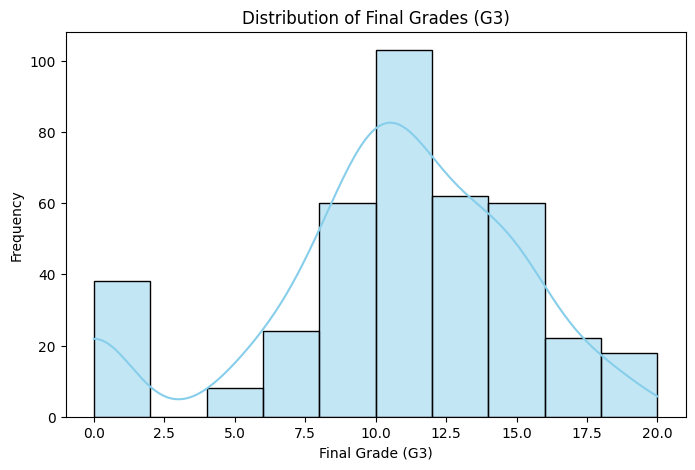

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df["G3"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()


## **2. Scatter Plot: Study Time vs. Final Grade**

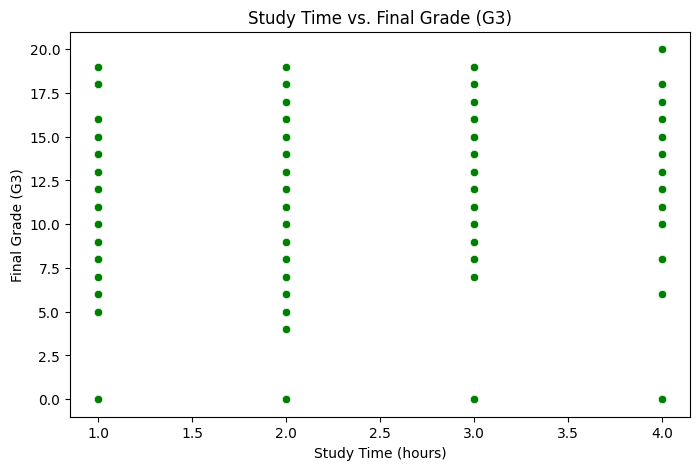

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["studytime"], y=df["G3"], color="green")
plt.title("Study Time vs. Final Grade (G3)")
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade (G3)")
plt.show()


## **3. Bar Chart: Average Final Grade by Gender**

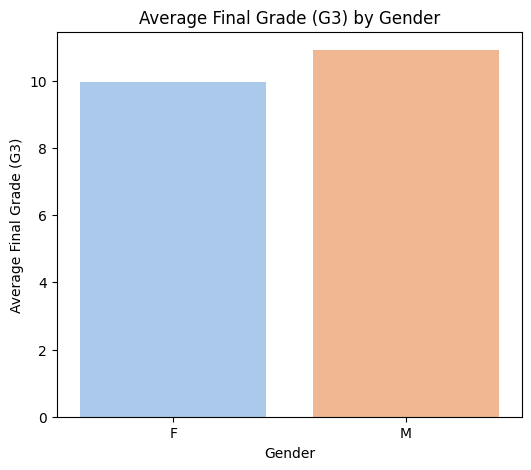

In [25]:
plt.figure(figsize=(6,5))
sns.barplot(x=average_g3_by_gender.index, y=average_g3_by_gender.values, hue=average_g3_by_gender.index, dodge=False, palette="pastel", legend=False)
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.show()
